In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
fraud_data=pd.read_csv("Fraud_check.csv")

# EDA

In [3]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
# Dealing with categorical of independent
fraud_data=pd.get_dummies(fraud_data,columns=["Undergrad","Marital.Status","Urban"],drop_first=True)

In [6]:
fraud_data["Taxable.Income"]=fraud_data["Taxable.Income"].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [7]:
fraud_data["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

### Train Test Split

In [8]:
x=fraud_data.drop(columns=["Taxable.Income"])
y=fraud_data["Taxable.Income"]

In [9]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=42)

# Model building

In [10]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [11]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7333333333333333

In [12]:
cv=KFold(n_splits=10)
modelll=RandomForestClassifier(n_estimators=100,random_state=42)
scores=cross_val_score(modelll,x_train,y_train,cv=cv)


In [13]:
scores

array([0.75      , 0.66666667, 0.77083333, 0.6875    , 0.75      ,
       0.8125    , 0.77083333, 0.72916667, 0.79166667, 0.77083333])

In [14]:
scores.mean()

0.75

# Hyperparameter tuning

In [15]:
n_estimators = list(range(1,200))
criterion=["gini", "entropy", "log_loss"]

parameters = {"n_estimators" : n_estimators, "criterion" : criterion}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [16]:
print(grid.best_score_)
print(grid.best_params_)

0.7645833333333333
{'criterion': 'log_loss', 'n_estimators': 6}


In [17]:
model = RandomForestClassifier(criterion= 'gini', n_estimators=6, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=8, random_state=0)

In [18]:
feature_scores = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

City.Population           0.564597
Work.Experience           0.327061
Marital.Status_Married    0.030592
Undergrad_YES             0.029929
Marital.Status_Single     0.026363
Urban_YES                 0.021457
dtype: float64

# Visualize feature scores of the features

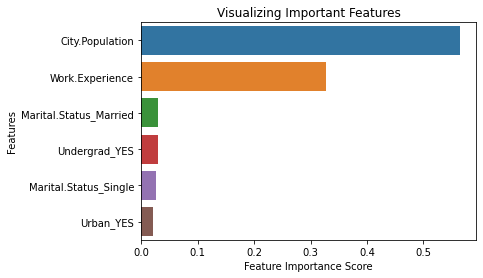

In [19]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [20]:
y_pred=model.predict(x_test)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n        Good       0.77      0.93      0.84        94\n       Risky       0.00      0.00      0.00        26\n\n    accuracy                           0.73       120\n   macro avg       0.38      0.46      0.42       120\nweighted avg       0.60      0.72      0.66       120\n'